In [98]:
import keras
keras.__version__

'2.4.3'

In [99]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()  # As a reminder.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

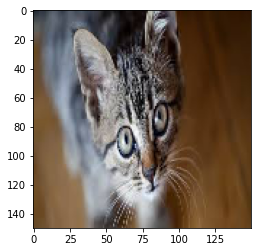

In [100]:
img_path = '/Users/Vaibhav_Beohar/Documents/VB_Mck_Docs/Other Trainings/deeplearning_fchollet_examples/data_samples/cat_sample.jpeg'
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
%matplotlib inline
from matplotlib.pyplot import imshow
%matplotlib inline
imshow(np.asarray(img))

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)


# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.


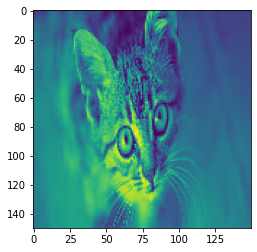

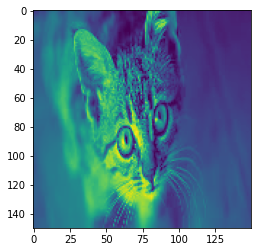

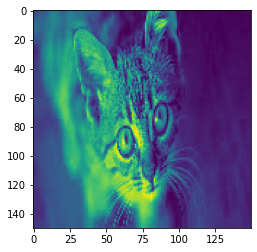

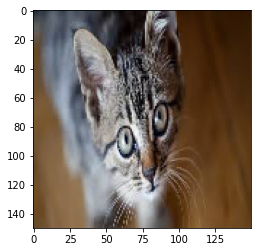

In [101]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0,:,:,0])
plt.show()
plt.imshow(img_tensor[0,:,:,1])
plt.show()
plt.imshow(img_tensor[0,:,:,2])
plt.show()
plt.imshow(img_tensor[0,:,:,:])
plt.show()

In [102]:
for layer in model.layers:
    print(layer.name)
#   print(type(layer))

print("\nprinting length of layers: ", len(model.layers))

conv2d_4
max_pooling2d_4
conv2d_5
max_pooling2d_5
conv2d_6
max_pooling2d_6
conv2d_7
max_pooling2d_7
flatten_1
dropout
dense_2
dense_3

printing length of layers:  12


In [103]:
print(model.input)

Tensor("conv2d_4_input:0", shape=(None, 150, 150, 3), dtype=float32)


In order to extract the feature maps we want to look at, we will create a Keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers. To do this, we will use the Keras class Model. A Model is instantiated using two arguments: an input tensor (or list of input tensors), and an output tensor (or list of output tensors). The resulting class is a Keras model, just like the Sequential models that you are familiar with, mapping the specified inputs to the specified outputs. What sets the Model class apart is that it allows for models with multiple outputs, unlike Sequential. For more information about the Model class, see Chapter 7, Section 1.




In [104]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [105]:
for layer in activation_model.layers:
    print(layer.name)
print("\nprinting length of layers: ", len(activation_model.layers))

conv2d_4_input
conv2d_4
max_pooling2d_4
conv2d_5
max_pooling2d_5
conv2d_6
max_pooling2d_6
conv2d_7
max_pooling2d_7

printing length of layers:  9


In [106]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)
print(len(activations))
print(activations)


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
8
[array([[[[6.06251396e-02, 4.48650867e-03, 3.00143403e-03, ...,
          1.78300440e-02, 0.00000000e+00, 7.74708539e-02],
         [6.36855960e-02, 5.12369536e-03, 3.76125355e-03, ...,
          1.85905322e-02, 0.00000000e+00, 8.38338956e-02],
         [7.06914514e-02, 6.47157244e-03, 3.76945012e-03, ...,
          2.75380351e-02, 0.00000000e+00, 8.42932388e-02],
         ...,
         [9.13970321e-02, 0.00000000e+00, 1.19011216e-02, ...,
          0.00000000e+00, 0.00000000e+00, 4.99858111e-02],
         [9.11939889e-02, 0.00000000e+00, 1.09986532e-02, ...,
          0.00000000e+00, 0.00000000e+00, 5.16811460e-02],
         [9.05104280e-02, 0.00000000e+00, 1.09885763e-02, ...,
          0.00000000e+00, 0.00000000e+00, 5.12399487e-02]],

        [[6.68691397e-02, 2.16311030e-03, 4.05510888e-03, ...,
          2.17105597e-02, 0.00000000e+00, 8.73251781e-02],
         [

In [107]:
# For instance, this is the activation of the first convolution layer for our cat image input:

first_layer_activation = activations[0]
print(first_layer_activation.shape)
print(first_layer_activation.shape[-1]) # This is the number of features in the feature map
print(first_layer_activation.shape[1])  # The feature map has shape (1, size, size, n_features)

(1, 148, 148, 32)
32
148


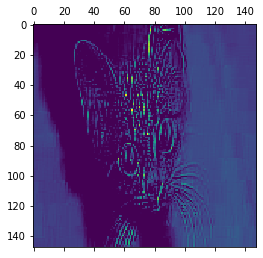

In [108]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

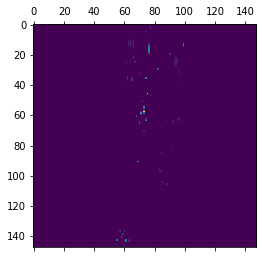

In [109]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

/Users/Vaibhav_Beohar/anaconda3/envs/tensorflow_keras/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


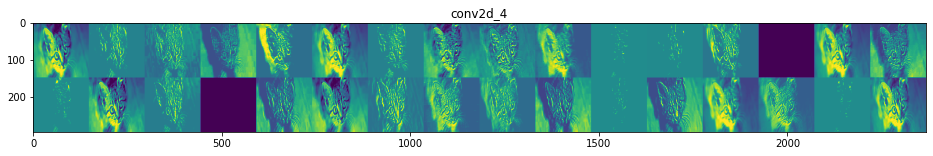

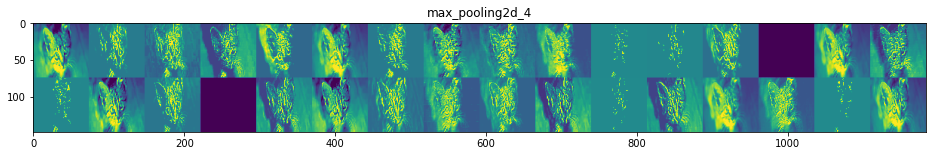

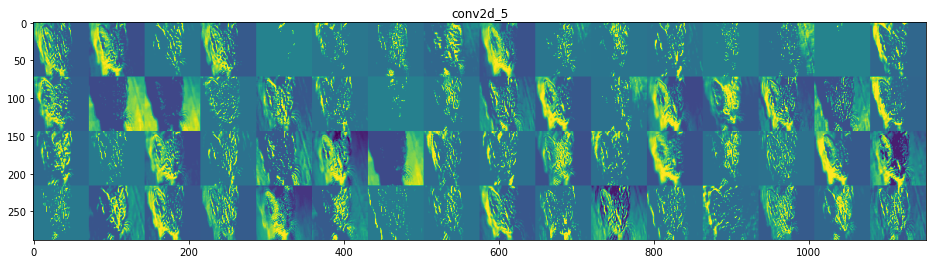

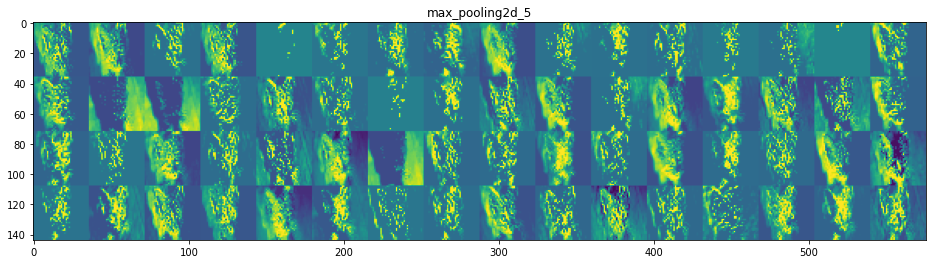

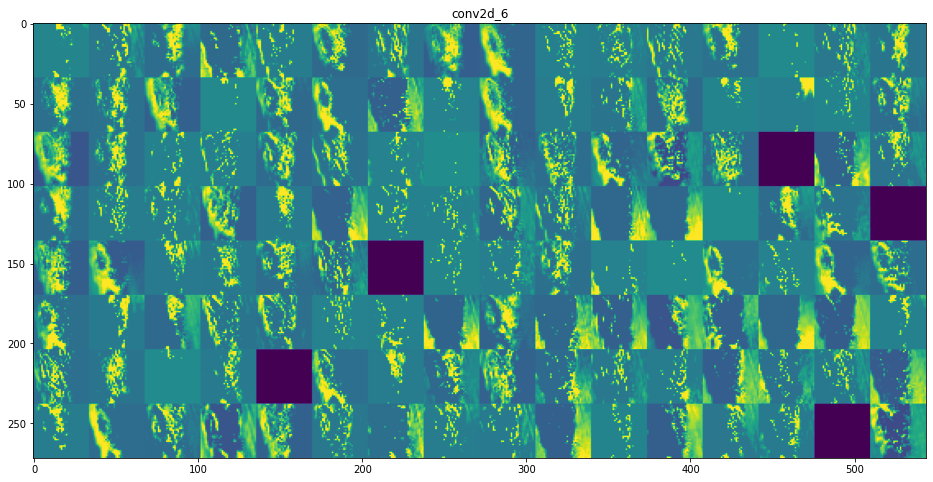

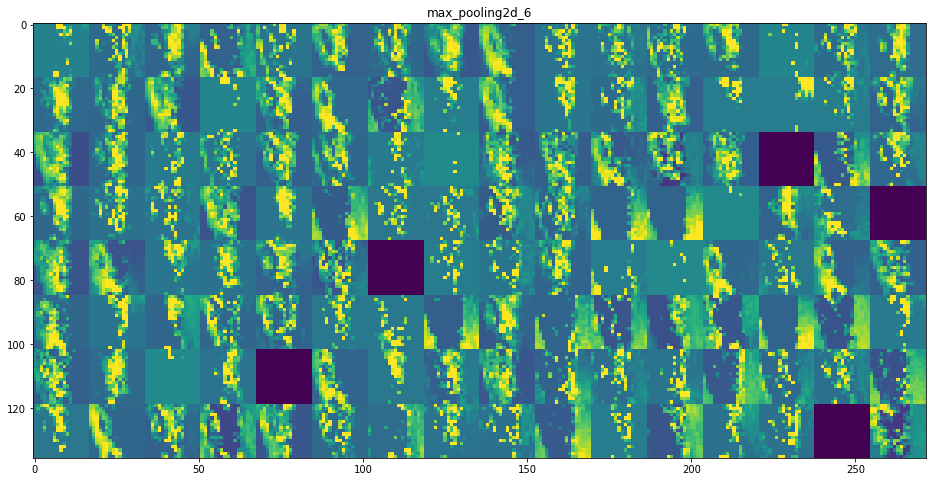

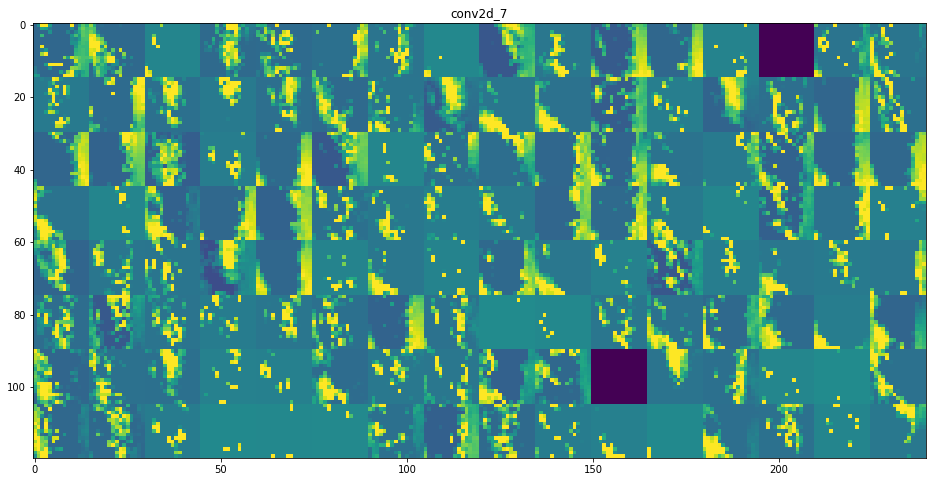

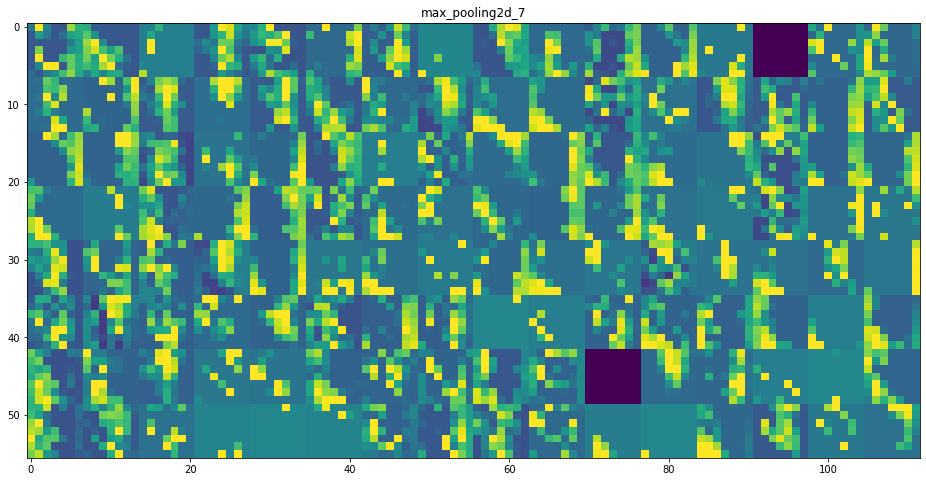

In [110]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

##### Visualizing convnet filters
Another easy thing to do to inspect the filters learned by convnets is to display the visual pattern that each filter is meant to respond to. This can be done with gradient ascent in input space: applying gradient descent to the value of the input image of a convnet so as to maximize the response of a specific filter, starting from a blank input image. The resulting input image would be one that the chosen filter is maximally responsive to.

The process is simple: we will build a loss function that maximizes the value of a given filter in a given convolution layer, then we will use stochastic gradient descent to adjust the values of the input image so as to maximize this activation value. For instance, here's a loss for the activation of filter 0 in the layer "block3_conv1" of the VGG16 network, pre-trained on ImageNet:



In [111]:
from keras.applications import VGG16
from keras import backend as K
import tensorflow as tf

model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
print(layer_output)
loss = K.mean(layer_output[:, :, :, filter_index])

Tensor("block3_conv1/Relu:0", shape=(None, None, None, 256), dtype=float32)


In [117]:
# to avoid this error: RuntimeError: tf.gradients is not supported when eager execution is enabled. Use tf.GradientTape instead.
# https://github.com/tensorflow/tensorflow/issues/34235

tf.compat.v1.disable_eager_execution()

In [113]:
grads = K.gradients(loss, model.input)[0]

In [114]:
print(grads.dtype)

<dtype: 'float32'>


In [115]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [116]:
iterate = K.function([model.input], [loss, grads])

# Let's test it:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [118]:
# We start from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# Run gradient ascent for 40 steps
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step ### This is gradient ASCENT! in grad_descent => new_param = old_param - step

The resulting image tensor will be a floating point tensor of shape (1, 150, 150, 3), with values that may not be integer within [0, 255]. Hence we would need to post-process this tensor to turn it into a displayable image. We do it with the following straightforward utility function:



In [119]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

Putting it all together:

In [120]:
def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

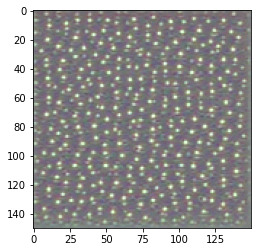

In [121]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


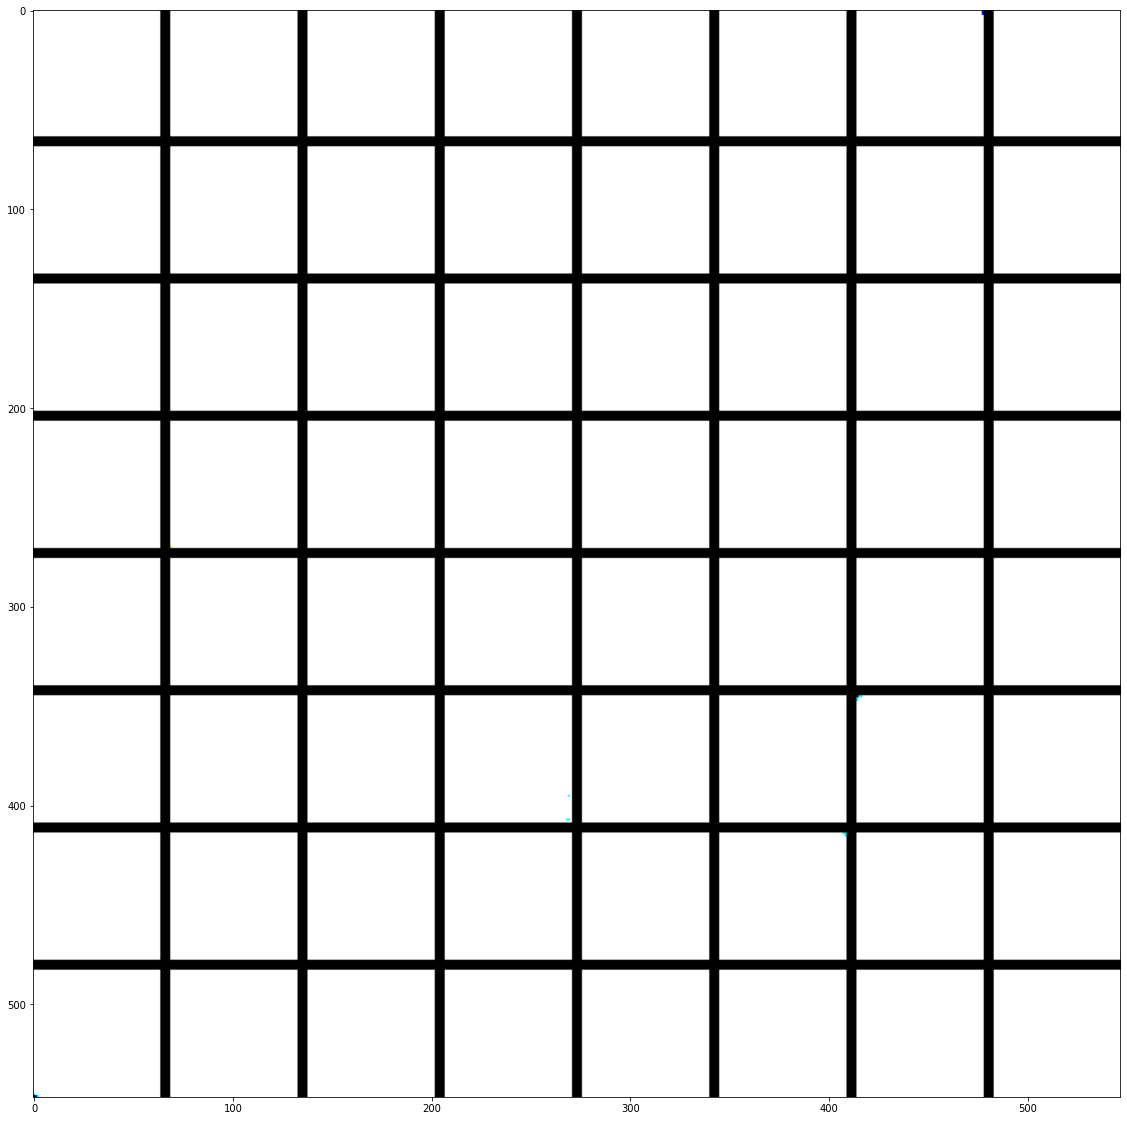

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


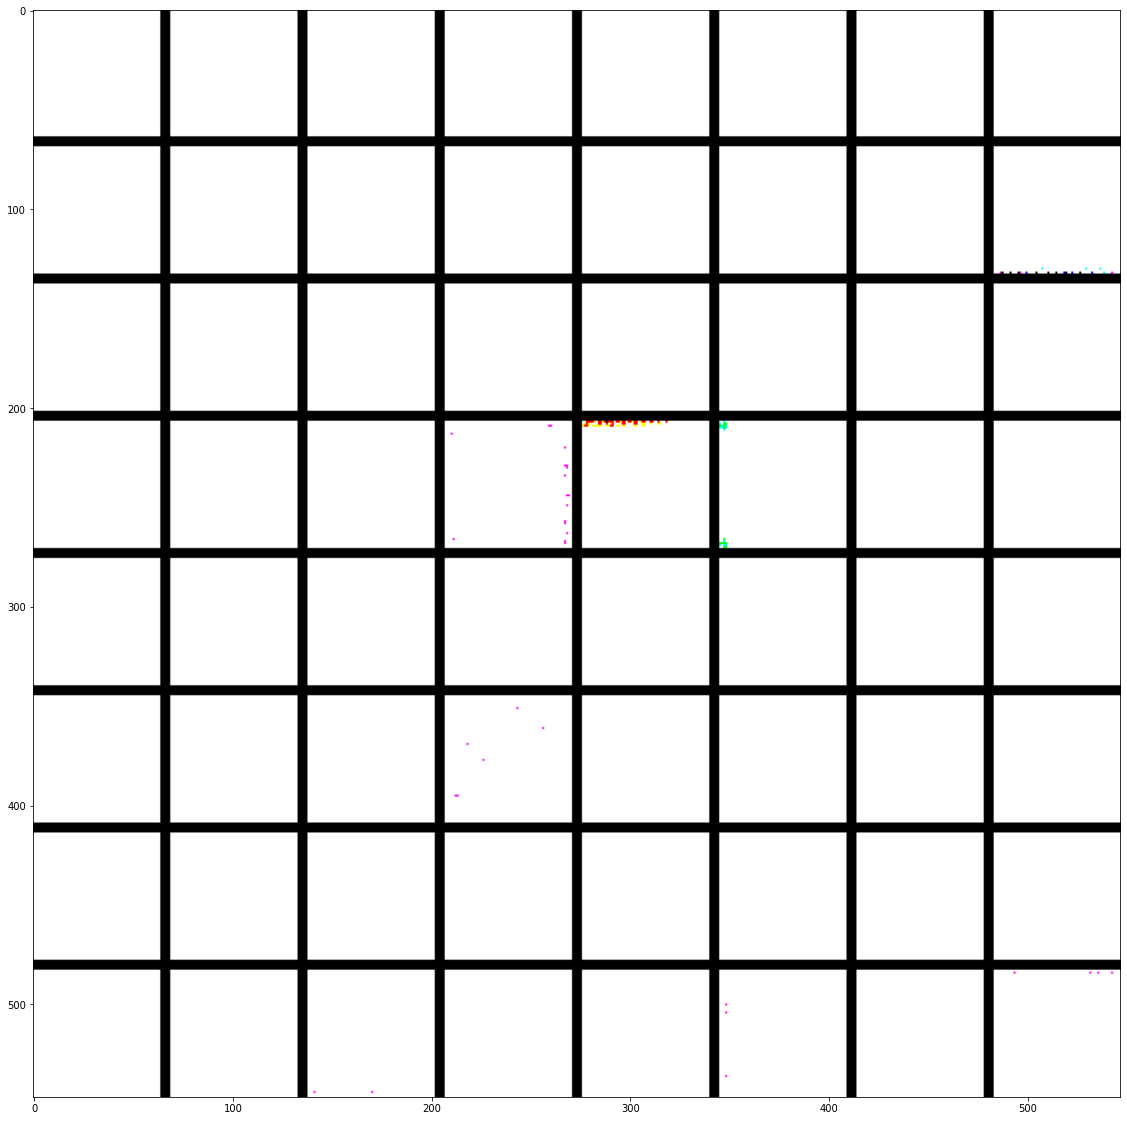

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


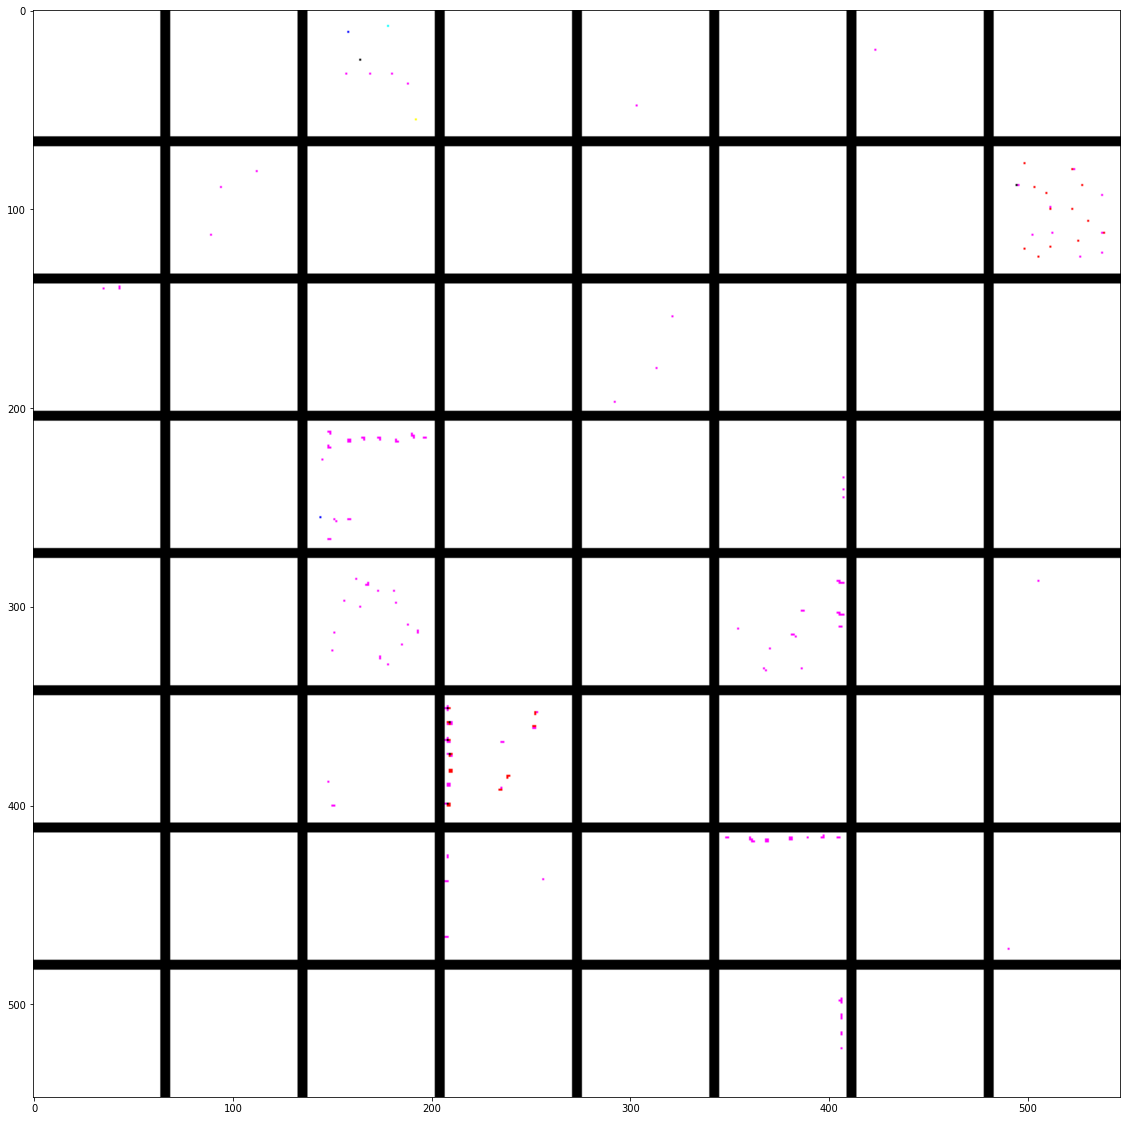

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


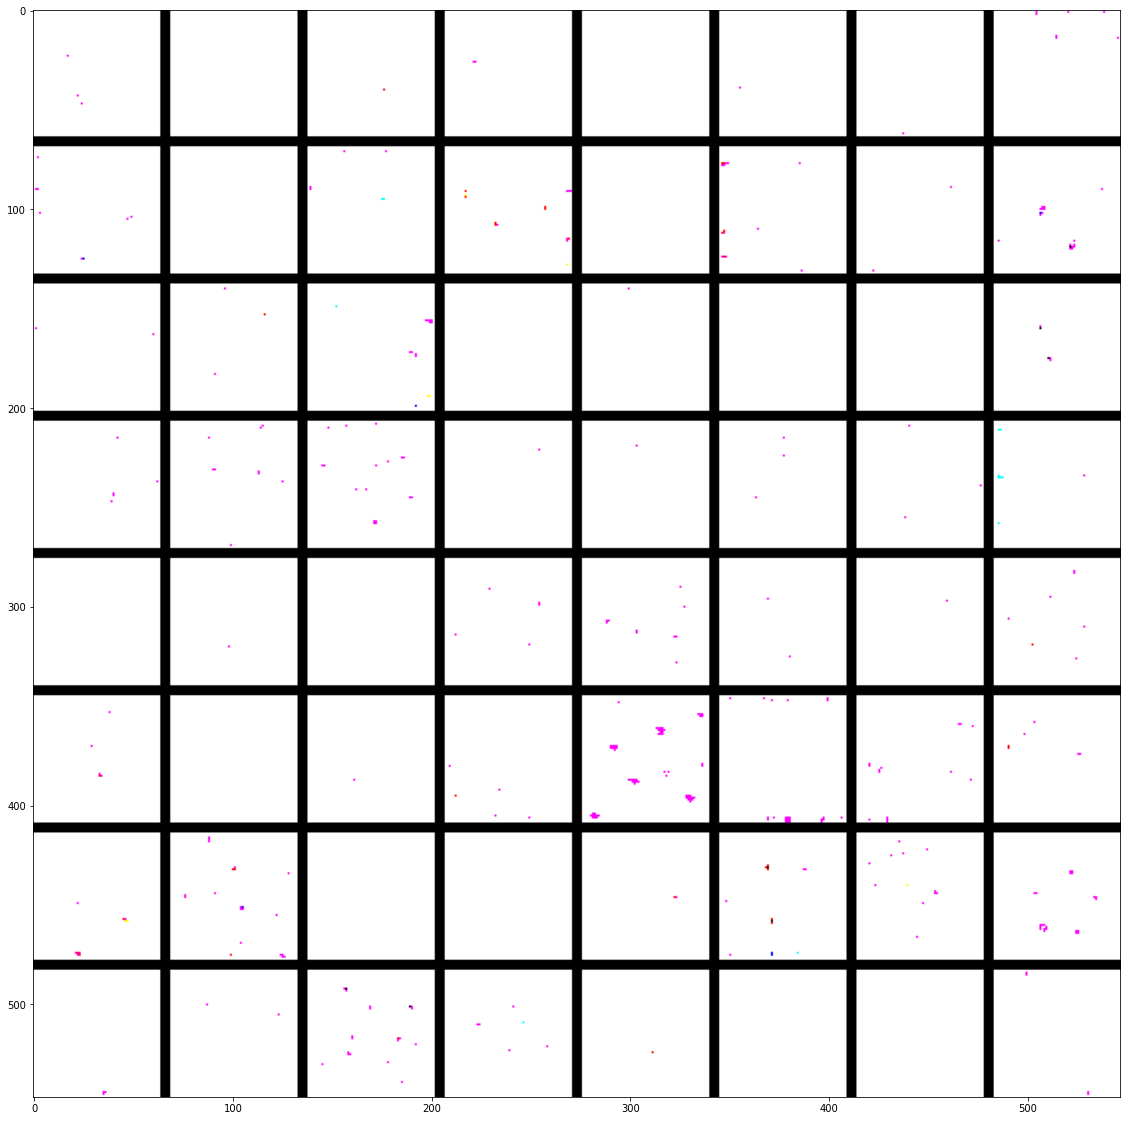

In [122]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # This a empty (black) image where we will store our results.
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):  # iterate over the rows of our results grid
        for j in range(8):  # iterate over the columns of our results grid
            # Generate the pattern for filter `i + (j * 8)` in `layer_name`
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # Put the result in the square `(i, j)` of the results grid
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # Display the results grid
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

##### Other important topic to consider and keep in mind for CNN-visualization:  

## Visualizing heatmaps of class activation

READ MORE HERE: https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb

And the specific implementation: **GRAD-CAM** (http://gradcam.cloudcv.org/)